#  WARNING: Before Running this notebook you should run the notebook called 'credits_eda_data_clean.ipynb'

In this notebook we will explore and try to make any conclusion about the given credits' dataset

In [1]:
import imp
from utils import utils
imp.reload(utils) 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
credit_data = pd.read_csv('../data_out/clean_credit_data.csv', dtype={'borrower_id': 'int64', 'age':'int64', 
                                                                     'serious_dlqin2yrs': 'int64', 'number_of_time30-59_days_past_due_not_worse': 'int64',
                                                                     'umber_of_open_credit_lines_and_loans':'int64', 'number_of_times90_days_late':'int64',
                                                                     'number_real_estate_loans_or_lines':'int64', 'number_of_time60-89_days_past_due_not_worse':'int64',
                                                                     'number_of_dependents':'int64'}, index_col=[0])

In [3]:
credit_data.head(10)

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,1,0.766127,45,2,0.802982,9120,13.0,0,6,0,2
1,2,0,0.957151,40,0,0.121876,2600,4.0,0,0,0,1
2,3,0,0.658180,38,1,0.085113,3042,2.0,1,0,0,0
3,4,0,0.233810,30,0,0.036050,3300,5.0,0,0,0,0
4,5,0,0.907239,49,1,0.024926,63588,7.0,0,1,0,0
5,6,0,0.213179,74,0,0.375607,3500,3.0,0,1,0,1
7,8,0,0.754464,39,0,0.209940,3500,8.0,0,0,0,0
9,10,0,0.189169,57,0,0.606291,23684,9.0,0,4,0,2
10,11,0,0.644226,30,0,0.309476,2500,5.0,0,0,0,0
11,12,0,0.018798,51,0,0.531529,6501,7.0,0,2,0,2


In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113838 entries, 0 to 149999
Data columns (total 12 columns):
borrower_id                                    113838 non-null int64
serious_dlqin2yrs                              113838 non-null int64
revolving_utilization_of_unsecured_lines       113838 non-null float64
age                                            113838 non-null int64
number_of_time30-59_days_past_due_not_worse    113838 non-null int64
debt_ratio                                     113838 non-null float64
monthly_income                                 113838 non-null int64
number_of_open_credit_lines_and_loans          113838 non-null float64
number_of_times90_days_late                    113838 non-null int64
number_real_estate_loans_or_lines              113838 non-null int64
number_of_time60-89_days_past_due_not_worse    113838 non-null int64
number_of_dependents                           113838 non-null int64
dtypes: float64(3), int64(9)
memory usage: 11.3 MB


In [5]:
round(credit_data.describe(percentiles=[.01, .05, .10, .25, .50, .75, .90, .95, .99]), 2)

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,113838.00,113838.00,113838.00,113838.00,113838.00,113838.00,113838.00,113838.00,113838.00,113838.00,113838.00,113838.00
mean,74999.59,0.07,0.32,51.43,0.26,0.35,6715.92,8.65,0.08,1.05,0.06,0.85
std,43297.58,0.25,0.34,14.27,0.69,0.28,5703.81,4.61,0.38,1.03,0.31,1.13
min,1.00,0.00,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1%,1485.37,0.00,0.00,24.00,0.00,0.00,820.00,1.00,0.00,0.00,0.00,0.00
5%,7453.85,0.00,0.00,29.00,0.00,0.01,1735.00,2.00,0.00,0.00,0.00,0.00
10%,14941.70,0.00,0.01,33.00,0.00,0.04,2351.70,3.00,0.00,0.00,0.00,0.00
25%,37591.25,0.00,0.04,41.00,0.00,0.15,3583.00,5.00,0.00,0.00,0.00,0.00
50%,74947.50,0.00,0.18,51.00,0.00,0.29,5503.00,8.00,0.00,1.00,0.00,0.00
75%,112493.75,0.00,0.54,62.00,0.00,0.47,8333.00,11.00,0.00,2.00,0.00,2.00


## serious_dlqin2yrs

Column **serious_dlqin2yrs** represents when a borrower doesn't pay its debts for more than 90 days. We will explore if there are some patterns in data that help us to prevent giving a credit to this kind of borrowers.

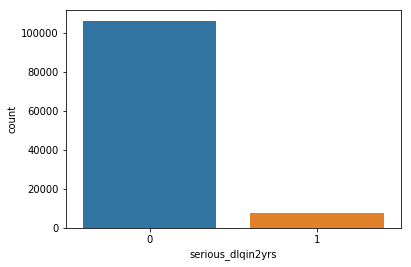

In [6]:
sns.countplot(credit_data.serious_dlqin2yrs);

In [7]:
print(credit_data.serious_dlqin2yrs.value_counts(normalize=True))

0    0.932957
1    0.067043
Name: serious_dlqin2yrs, dtype: float64


Unsurprisingly data suffer of high bias, cases of delinquency are rare and this is the kind of data distribution we can expect. 
Around 6.4% of granted credits are not paid. This is not a low rate and thus improve credit scores is an bussiness oportunity.

### Risk by borrower's age

In [8]:
age_vs_del = pd.DataFrame(index=['18_to_25','26_to_30','31_to_40','41_to_50','51_to_60','61_to_70','71_to_80','81_to_90','91_to_100'],
                         columns=['amount_of_borrowers', 'delinq_amount'])
age_vs_del.loc['18_to_25', 'delinq_amount'] = credit_data[(credit_data.age >= 18) & (credit_data.age <= 25)].serious_dlqin2yrs.sum()
age_vs_del.loc['26_to_30', 'delinq_amount'] = credit_data[(credit_data.age >= 26) & (credit_data.age <= 30)].serious_dlqin2yrs.sum()
age_vs_del.loc['31_to_40', 'delinq_amount'] = credit_data[(credit_data.age >= 31) & (credit_data.age <= 40)].serious_dlqin2yrs.sum()
age_vs_del.loc['41_to_50', 'delinq_amount'] = credit_data[(credit_data.age >= 41) & (credit_data.age <= 50)].serious_dlqin2yrs.sum()
age_vs_del.loc['51_to_60', 'delinq_amount'] = credit_data[(credit_data.age >= 51) & (credit_data.age <= 60)].serious_dlqin2yrs.sum()
age_vs_del.loc['61_to_70', 'delinq_amount'] = credit_data[(credit_data.age >= 61) & (credit_data.age <= 70)].serious_dlqin2yrs.sum()
age_vs_del.loc['71_to_80', 'delinq_amount'] = credit_data[(credit_data.age >= 71) & (credit_data.age <= 80)].serious_dlqin2yrs.sum()
age_vs_del.loc['81_to_90', 'delinq_amount'] = credit_data[(credit_data.age >= 81) & (credit_data.age <= 90)].serious_dlqin2yrs.sum()
age_vs_del.loc['91_to_100', 'delinq_amount'] = credit_data[(credit_data.age >= 91) & (credit_data.age <= 100)].serious_dlqin2yrs.sum()

age_vs_del.loc['18_to_25', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 18) & (credit_data.age <= 25)].age.count()
age_vs_del.loc['26_to_30', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 26) & (credit_data.age <= 30)].age.count()
age_vs_del.loc['31_to_40', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 31) & (credit_data.age <= 40)].age.count()
age_vs_del.loc['41_to_50', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 41) & (credit_data.age <= 50)].age.count()
age_vs_del.loc['51_to_60', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 51) & (credit_data.age <= 60)].age.count()
age_vs_del.loc['61_to_70', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 61) & (credit_data.age <= 70)].age.count()
age_vs_del.loc['71_to_80', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 71) & (credit_data.age <= 80)].age.count()
age_vs_del.loc['81_to_90', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 81) & (credit_data.age <= 90)].age.count()
age_vs_del.loc['91_to_100', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 91) & (credit_data.age <= 100)].age.count()

#Percentage of debtors by age

age_vs_del['delinq_ratio'] = age_vs_del.apply(utils.get_ratio, args=('delinq_amount', 'amount_of_borrowers'), axis=1)

In [9]:
age_vs_del.sort_values(by='delinq_ratio', ascending=False)

,amount_of_borrowers,delinq_amount,delinq_ratio
18_to_25,1886,209,0.11
26_to_30,6075,680,0.11
31_to_40,19932,1854,0.09
41_to_50,28149,2249,0.08
51_to_60,26756,1639,0.06
61_to_70,19541,702,0.04
71_to_80,8627,232,0.03
81_to_90,2669,62,0.02
91_to_100,203,5,0.02


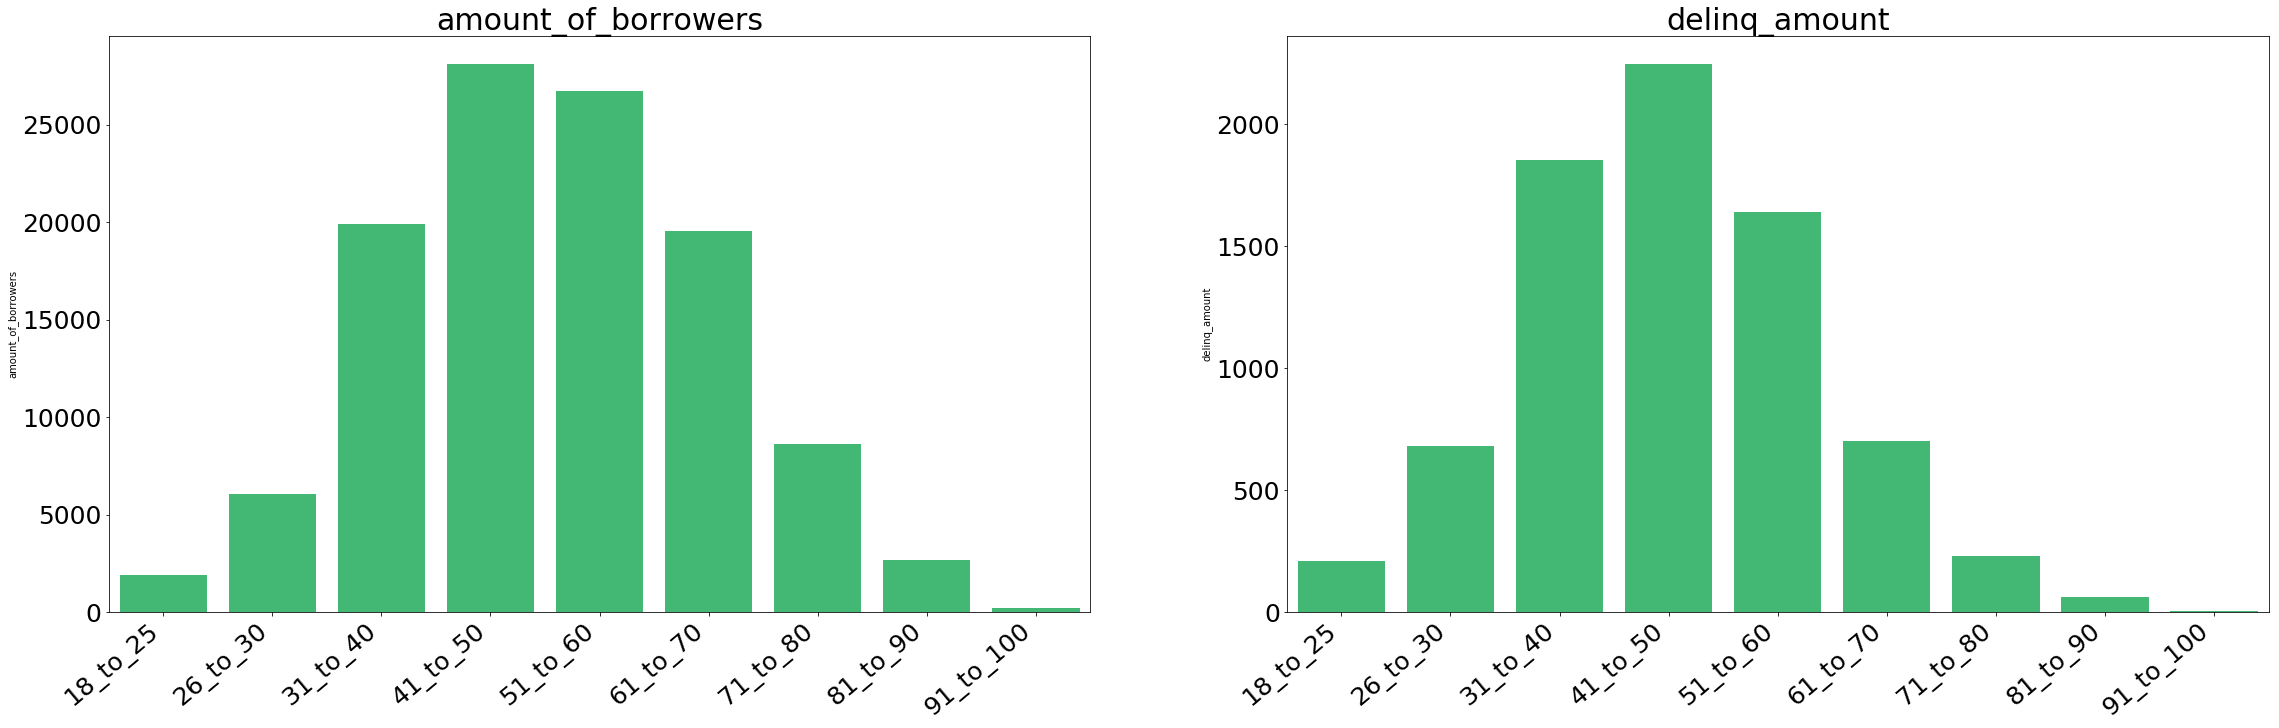

In [10]:
#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histograms
ax1 = sns.barplot(x=age_vs_del.index , y='amount_of_borrowers', data=age_vs_del, ax=axes_1, color='#2ecc71');
ax2 = sns.barplot(x=age_vs_del.index , y='delinq_amount', data=age_vs_del, ax=axes_2, color='#2ecc71');

    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=25)
axes_2.tick_params(labelsize=25)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

axes_1.set_title('amount_of_borrowers',fontsize= 30)
axes_2.set_title('delinq_amount',fontsize= 30)


#Show
plt.show()


Most of borrowers are between 40 and 60 years old, being the ones bewteen 41 and 50 years old more risky than borrowers between 50 and 60.
Another interesting thing is that borrowers under 30 years old are the more risky, this is interesting since these groups represents new clients for the bank or the organization giving the loans. This could happen for many things and one of the reasons can be that credit scores has little or no finantial information about young people, many starting in the finantial world and with less stability than older borrowers.

In [11]:
under_30 = age_vs_del.loc['18_to_25','amount_of_borrowers'] + age_vs_del.loc['26_to_30','amount_of_borrowers'] 
total_borrowers = age_vs_del.amount_of_borrowers.sum()
under_30_dlq = age_vs_del.loc['18_to_25','delinq_amount'] + age_vs_del.loc['26_to_30','delinq_amount'] 
delinq_ratio = round(under_30_dlq/ under_30, 2)
print ("amount of borrowers under 30 years old: {0}".format(under_30))
print ("total amount of borrowers: {0}".format(total_borrowers))
print ("percentage of delinquency in borrowers under 30 years old: {0}".format(100*delinq_ratio) )

amount of borrowers under 30 years old: 7961
total amount of borrowers: 113838
percentage of delinquency in borrowers under 30 years old: 11.0


## monthly income

### Zero monthly income

In [12]:
zero_income = credit_data[credit_data.monthly_income == 0]

In [13]:
zero_income.serious_dlqin2yrs.value_counts(normalize=True)

0    1.0
Name: serious_dlqin2yrs, dtype: float64

As we can see there is no relation between zero income borrowers and delinquent acts, actually  the percentage of people within this population that doesn't pay is lower than the general population making it a more healthy population.

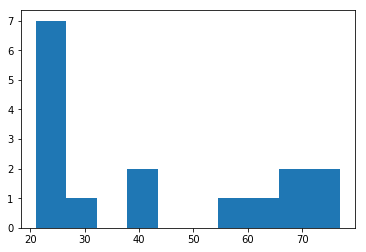

In [14]:
 zero_income.age.hist(grid=False);

In [15]:
zero_income.describe()

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,16.000000,16.0,16.000000,16.000000,16.000000,16.0,16.0,16.000000,16.0,16.0,16.0000,16.0000
mean,73384.437500,0.0,0.158381,42.125000,0.125000,1.0,0.0,2.187500,0.0,0.0,0.0625,0.0625
std,55699.611224,0.0,0.330449,22.017796,0.341565,0.0,0.0,1.721191,0.0,0.0,0.2500,0.2500
min,1123.000000,0.0,0.001705,21.000000,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0000,0.0000
25%,22221.750000,0.0,0.004326,22.750000,0.000000,1.0,0.0,1.000000,0.0,0.0,0.0000,0.0000
50%,74401.000000,0.0,0.043956,33.000000,0.000000,1.0,0.0,1.000000,0.0,0.0,0.0000,0.0000
75%,134009.750000,0.0,0.070359,65.000000,0.000000,1.0,0.0,3.250000,0.0,0.0,0.0000,0.0000
max,147955.000000,0.0,1.000000,77.000000,1.000000,1.0,0.0,5.000000,0.0,0.0,1.0000,1.0000


In the previous notebook *credits_eda_data_clean* we clean most of the higher values for debt_ratio this cause to most of zero monthly income be removed as well. It can be interesting to analyze these zero income values since they have many values in the group of 18 to 30 yeards old borrowers. Some extra research about high debt ratios (values above 1000) and zero monthly income could lead insights for the bussiness.

 ### Monthly_income VS serious_dlqin2yrs

/Users/rbechler/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


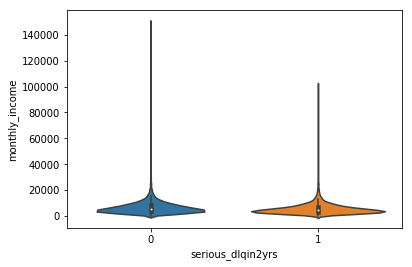

In [16]:
sns.violinplot(x='serious_dlqin2yrs', y='monthly_income', data=credit_data);

There is no apparent relation between monthly_income and delinquency. Distributions are pretty similar, just that for serious_dlqin2yrs = 0 data it's more scattered.

### Monthly income vs number_of_open_credit_lines_and_loans

/Users/rbechler/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


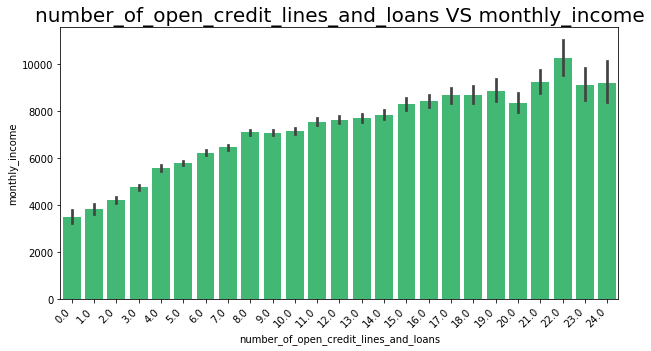

In [17]:
#Create subplots
fig, ax = plt.subplots(figsize=(10,5))

ax1 = sns.barplot(x='number_of_open_credit_lines_and_loans' , y='monthly_income', ax=ax, data=credit_data, color='#2ecc71');

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

ax1.set_title('number_of_open_credit_lines_and_loans VS monthly_income',fontsize= 20)
plt.show()

Some correlation exist between the number of credit that people takes and its monthly_income, now will see if having more open credit lines and loans it is also more risky.

## number_of_open_credit_lines_and_loans

### number_of_open_credit_lines_and_loans VS serious_dlqin2yrs

/Users/rbechler/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


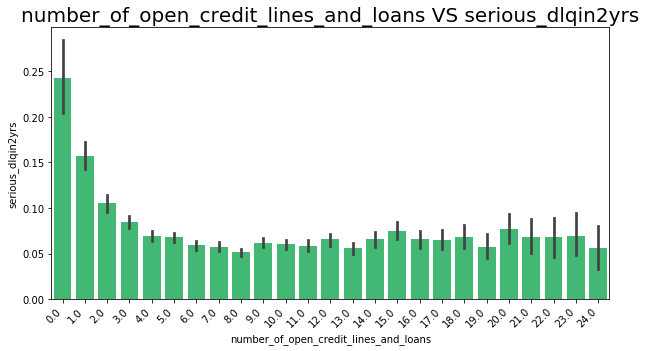

In [18]:
#Create subplots
fig, ax = plt.subplots(figsize=(10,5))

ax1 = sns.barplot(x='number_of_open_credit_lines_and_loans' , y='serious_dlqin2yrs', ax=ax, data=credit_data, color='#2ecc71');

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

ax1.set_title('number_of_open_credit_lines_and_loans VS serious_dlqin2yrs',fontsize= 20)
plt.show()


People who have less open credits is more risky than people that already have other credit lines or loans. Also people who have more than 2 open credit lines have almost the same risk of not to pay. This could help to improve the approval of the credit score, if a person has more open credit lines could be more trustable.

## revolving_utilization_of_unsecured_lines

### revolving_utilization_of_unsecured_lines VS serious_dlqin2yrs

/Users/rbechler/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


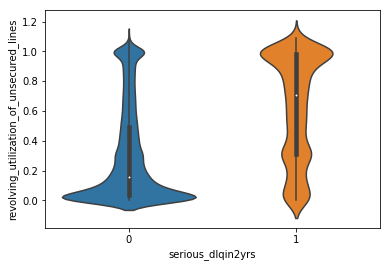

In [19]:
sns.violinplot(x='serious_dlqin2yrs', y='revolving_utilization_of_unsecured_lines', data=credit_data);

We can see that for the cases of delinquency distribution of resolving utilization of unsercured lines is close to 1. This makes sense since if one person has debts close to its credit limits most probably that will be difficult to pay new debts. We will try to see if monthly_income can help us to discriminate more accurately risky borrowers. 

### revolving_utilization_of_unsecured_lines VS monthly_income

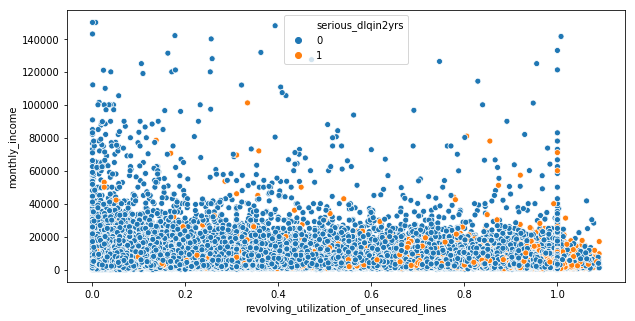

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='revolving_utilization_of_unsecured_lines', y='monthly_income', hue='serious_dlqin2yrs', data=credit_data,ax=ax);

It seems that when revolving_utilization_of_unsecured_lines is greater than 0.7 and monthly_income is below ~25000 there are many cases of delinquency.

In [21]:
num = credit_data[(credit_data.revolving_utilization_of_unsecured_lines > 0.7) & (credit_data.monthly_income < 25000)].serious_dlqin2yrs.value_counts()
den = credit_data.serious_dlqin2yrs.value_counts()
print("{0}% of the total values when there is NOT delinquency cases are in this region".format(round(100*(num/den),2).values[0]))
print("{0}% of the total values when there IS delinquency cases are in this region".format(round(100*(num/den),2).values[1]))

16.15% of the total values when there is NOT delinquency cases are in this region
50.35% of the total values when there IS delinquency cases are in this region


We can see that around 50% of the delinquency cases are in this region when only 16% of the good payers are here.

## Debt columns
* number_of_time30-59_days_past_due_not_worse
* number_of_time60-89_days_past_due_not_worse
* number_of_times90_days_late

We want to know if there is any correlation between past due debts and between them and delinquent acts.

In [22]:
debt_credit_data = credit_data[['number_of_time30-59_days_past_due_not_worse', 'number_of_time60-89_days_past_due_not_worse', 'number_of_times90_days_late', 'serious_dlqin2yrs']]

In [23]:
debt_credit_data.corr()

,number_of_time30-59_days_past_due_not_worse,number_of_time60-89_days_past_due_not_worse,number_of_times90_days_late,serious_dlqin2yrs
number_of_time30-59_days_past_due_not_worse,1.000000,0.294699,0.239115,0.271884
number_of_time60-89_days_past_due_not_worse,0.294699,1.000000,0.298615,0.261412
number_of_times90_days_late,0.239115,0.298615,1.000000,0.321149
serious_dlqin2yrs,0.271884,0.261412,0.321149,1.000000


We can see that there is low correlation between this features, never the less, some little amount of correlation exists. As these 3 columns are representing days past due we will see if we can combine them and see if we can get a new variable more correlated with delinquent cases. 
To do this we will linearly combine this features weighting values that represent holding debt for a longer periods.

*past_due_comb = 1 x **number_of_time30-59_days_past_due_not_worse** + 2 x **number_of_time60-89_days_past_due_not_worse** + 3 x **number_of_times90_days_late***

In [24]:
def combine_debts(row):
    '''
        compute and returns the linear combination of all days past due, 
        giving more importance when more days have past without pay.
    '''
    return row['number_of_time30-59_days_past_due_not_worse'] +  2*row['number_of_time60-89_days_past_due_not_worse'] + 3*row['number_of_times90_days_late']

In [25]:
debt_credit_data['past_due_comb'] = debt_credit_data.apply(combine_debts, axis=1)

/Users/rbechler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
debt_credit_data.corr()

,number_of_time30-59_days_past_due_not_worse,number_of_time60-89_days_past_due_not_worse,number_of_times90_days_late,serious_dlqin2yrs,past_due_comb
number_of_time30-59_days_past_due_not_worse,1.000000,0.294699,0.239115,0.271884,0.640143
number_of_time60-89_days_past_due_not_worse,0.294699,1.000000,0.298615,0.261412,0.649823
number_of_times90_days_late,0.239115,0.298615,1.000000,0.321149,0.830884
serious_dlqin2yrs,0.271884,0.261412,0.321149,1.000000,0.399510
past_due_comb,0.640143,0.649823,0.830884,0.399510,1.000000


We create a new feature that is more correlated with delinquency cases. We will use this feture and drop the other days past due columns.

In [27]:
credit_data['past_due_comb'] = debt_credit_data.apply(combine_debts, axis=1)

In [28]:
credit_data = credit_data.drop('number_of_time30-59_days_past_due_not_worse', axis=1)
credit_data = credit_data.drop('number_of_time60-89_days_past_due_not_worse', axis=1)
credit_data = credit_data.drop('number_of_times90_days_late', axis=1)

## number_real_estate_loans_or_lines

### number_real_estate_loans_or_lines VS number_of_open_credit_lines_and_loans

/Users/rbechler/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


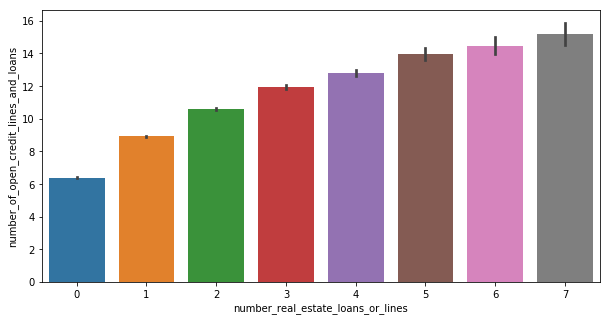

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='number_real_estate_loans_or_lines', y='number_of_open_credit_lines_and_loans', data=credit_data,ax=ax);

There is certain correlatioon between these two columns, this is an expected behavior since both columns share information related to mortgage.

We will study the relation with borrower's age

/Users/rbechler/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


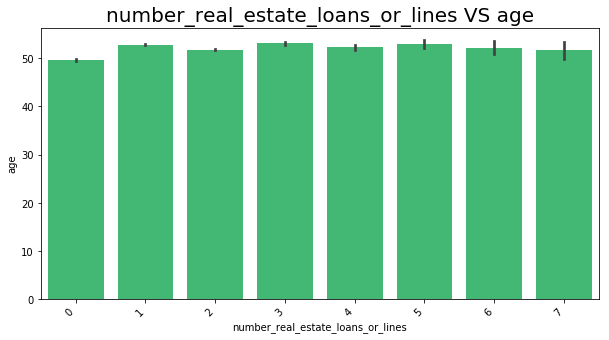

In [30]:
#Create subplots
fig, ax = plt.subplots(figsize=(10,5))

ax1 = sns.barplot(x='number_real_estate_loans_or_lines' , y='age', ax=ax, data=credit_data, color='#2ecc71');

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

ax1.set_title('number_real_estate_loans_or_lines VS age',fontsize= 20)
plt.show()

Number of real state loans or mortage is independent from borrower's age

Now we will analyze if there is any relation between people who have more real state loans and episodes of debt

/Users/rbechler/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


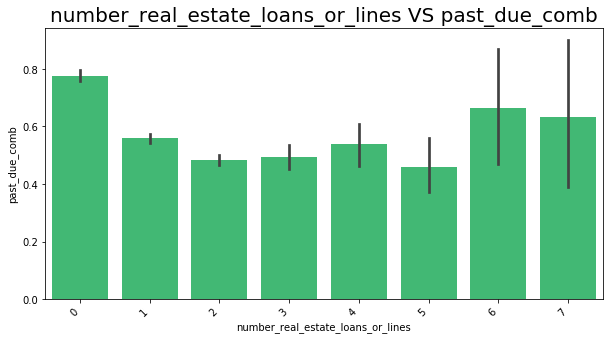

In [31]:
#Create subplots
fig, ax = plt.subplots(figsize=(10,5))

ax1 = sns.barplot(x='number_real_estate_loans_or_lines' , y='past_due_comb', ax=ax, data=credit_data, color='#2ecc71');

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

ax1.set_title('number_real_estate_loans_or_lines VS past_due_comb',fontsize= 20)
plt.show()

There is no apparent relation between past_due_comb and number_real_estate_loans_or_lines, and since it has certain amount of correlation with column number_of_open_credit_lines_and_loans (which has a patter with delinquency cases) this column is candidate to be droped.

## number_of_dependents

### number_of_dependents VS number_of_open_credit_lines_and_loans

/Users/rbechler/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


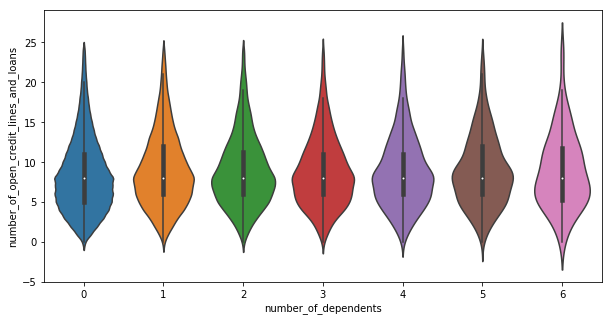

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x='number_of_dependents', y='number_of_open_credit_lines_and_loans', data=credit_data, ax=ax);

/Users/rbechler/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


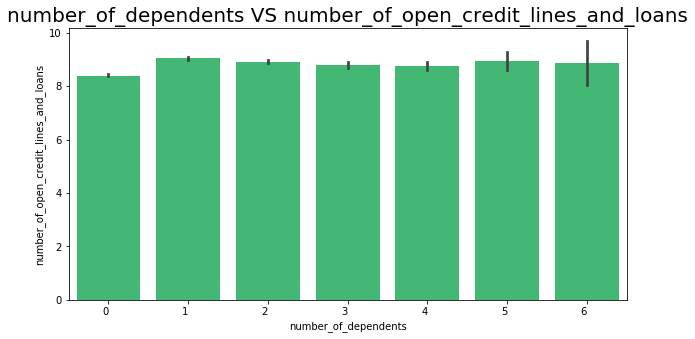

In [33]:
#Create subplots
fig, ax = plt.subplots(figsize=(10,5))

ax1 = sns.barplot(x='number_of_dependents' , y='number_of_open_credit_lines_and_loans', ax=ax, data=credit_data, color='#2ecc71');

ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")

ax1.set_title('number_of_dependents VS number_of_open_credit_lines_and_loans',fontsize= 20)
plt.show()

If it is true that distributions are very similar, in the case of borrowers with a number of dependent of 6 has a longer tail in the direction of more open credit lines.

### number_of_dependents  VS debt_ratio	

/Users/rbechler/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


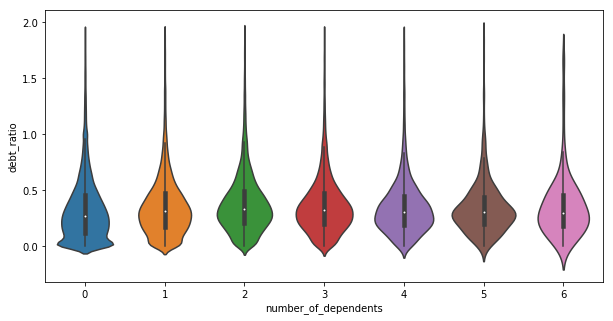

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x='number_of_dependents', y='debt_ratio', data=credit_data, ax=ax);

Distributions are very similar, we can see that borrowers that have 1 or less dependents has a little peak in lower debt_ratios.

We will create a new feature call ***monthly_income_per_head*** this will be: 
monthly_income / number_of_dependets, and we will analyze this new feature against debt_ratio and past due debt.

In [35]:
def compute_monthly_income_per_head(row):
    '''
        computes monthly_income / number_of_dependets for a borrower
    '''
    if row.number_of_dependents == 0:
        denominator = 1
    else:
        denominator = row.number_of_dependents
    return round(row.monthly_income/denominator, 2)

In [36]:
credit_data['monthly_income_per_head'] = credit_data.apply(compute_monthly_income_per_head, axis=1)

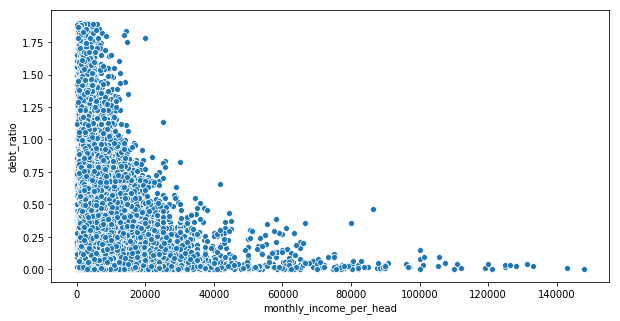

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='monthly_income_per_head', y='debt_ratio', data=credit_data, ax=ax);

/Users/rbechler/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


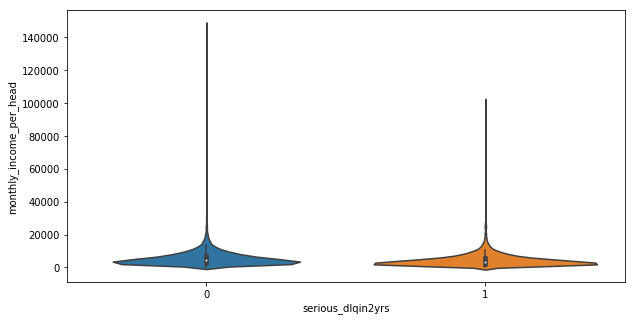

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x='serious_dlqin2yrs', y='monthly_income_per_head', data=credit_data, ax=ax); 

This last feature doesn't seems to add any useful information to the information we already have. Thus will be discarded.

In [39]:
credit_data = credit_data.drop('monthly_income_per_head', axis=1)

# Correlation map

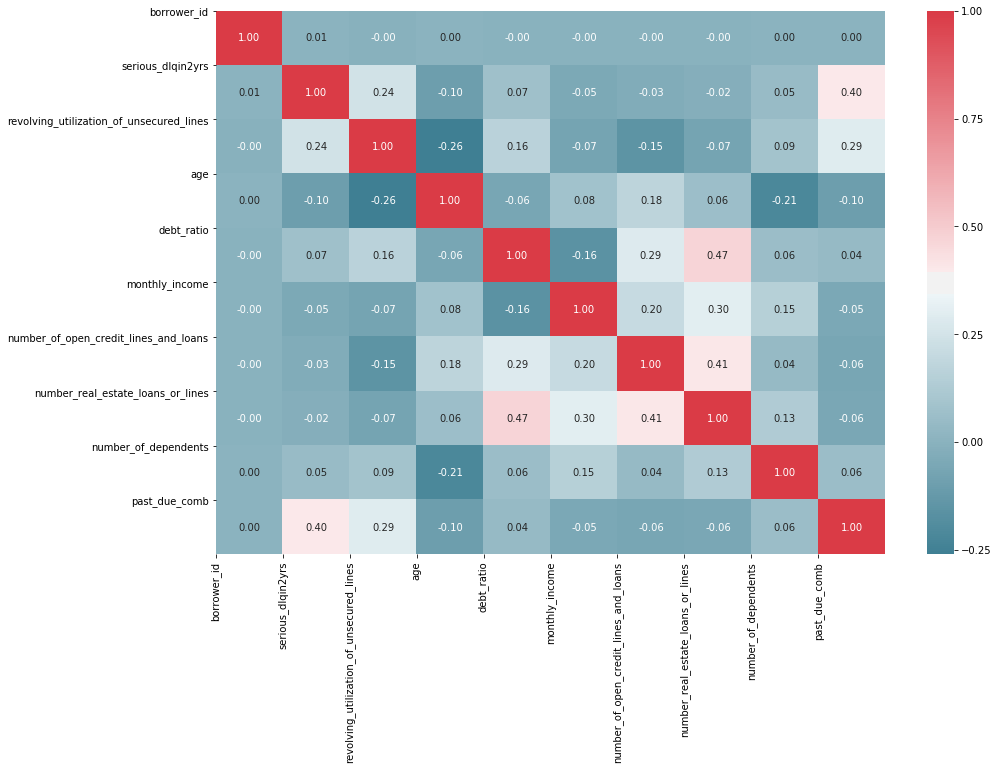

In [40]:
#Create Correlation df
corr = credit_data.corr()

fig, ax = plt.subplots(figsize=(15, 10))

colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

We have performed an exploratory analysis over a credits' borrowers dataset, we've got some interesting conclusions:

- Around 6.70% of the awarded credits are not paid.
- Around 11% of borrowers under 30 years ends experiencing 90 days past due delinquency or worse. Borrowers under 30 years old represents approximately 7% of the borrowers.
- Most of borrowers are between 40 and 60 years old, being the ones bewteen 41 and 50 years old more risky
- People that already have a credit line or loan it is less risky than new clients, actually borrowers become equaly risky from their third credit line or loan.
- As greater a person's "debt-to-limit ratio" or “credit utilization” is, the more probable this person doesn't pay a new credit line debt.
- 50% of borrowers that experienced 90 days past due delinquency or worse are using above 70% of its credit limits and earn less than 25000 per month.

# Credit Score

As we saw 6.7% of awarded credits are not paid, this number is non-negligible and we will see if we can propoose a clasification system to give a percentage or risk

In [41]:
credit_data.columns

Index(['borrower_id', 'serious_dlqin2yrs',
       'revolving_utilization_of_unsecured_lines', 'age', 'debt_ratio',
       'monthly_income', 'number_of_open_credit_lines_and_loans',
       'number_real_estate_loans_or_lines', 'number_of_dependents',
       'past_due_comb'],
      dtype='object')

columns borrower_id, number_real_estate_loans_or_lines and number_of_dependents will be drop since as we saw in the previous analysis they don't add any extra usefull information for this particular problem.

In [42]:
credit_data = credit_data.drop(['borrower_id', 'number_real_estate_loans_or_lines', 'number_of_dependents'],  axis=1)

In [43]:
credit_data.columns

Index(['serious_dlqin2yrs', 'revolving_utilization_of_unsecured_lines', 'age',
       'debt_ratio', 'monthly_income', 'number_of_open_credit_lines_and_loans',
       'past_due_comb'],
      dtype='object')

In [44]:
# The dependent variable is serious_dlqin2yrs and the rest are the independent ones
y = credit_data['serious_dlqin2yrs']
x = credit_data.loc[:, credit_data.columns != 'serious_dlqin2yrs']

In [45]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

As classes are very skewed we will over-sampling possitive examples in order to not to loose data, then we will shuffle data. We are over-sampling after splitting data to avoid introducing data from the test set into the training set. 

To peform the over-sampling we will use SMOTE (Synthetic Minority Over-sampling Technique).  [https://arxiv.org/pdf/1106.1813.pdf]

SMOTE is bassically finding the k-nearest-neighbors for minority class observations and then creating a new observation from a randomly choose neighbor.

To install imblearn execute: **pip install imblearn** I owe you the docker, sorry for that!

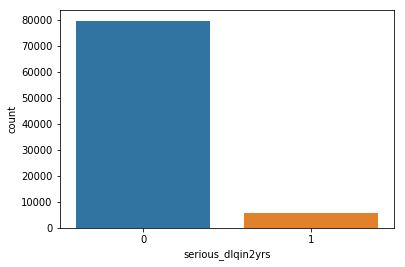

In [46]:
#Classes before resampling
sns.countplot(y_train);

In [47]:
print("X_train lenght: ",len(X_train))
print("y_train lenght: ",len(y_train))
print("----------------------")
print("X_test lenght: ",len(X_test))
print("y_test lenght: ",len(y_test))

X_train lenght:  85378
y_train lenght:  85378
----------------------
X_test lenght:  28460
y_test lenght:  28460


In [48]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, ratio='minority') #resample minority class
X_res, y_res = sm.fit_resample(X_train, y_train)

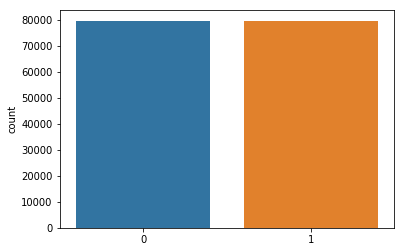

In [49]:
#Classes after resampling
sns.countplot(y_res);

In [50]:
print("X_train lenght: ",len(X_res))
print("y_train lenght: ",len(y_res))
print("----------------------")
print("X_test lenght: ",len(X_test))
print("y_test lenght: ",len(y_test))

X_train lenght:  159254
y_train lenght:  159254
----------------------
X_test lenght:  28460
y_test lenght:  28460


## Random Forest Classifier

To make our **baseline** we will use a Randome forest classifier since are generally quite immune to statistical assumptions and noise in data.

In [51]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=0, n_jobs=-1)

As the number of hyperparameters and data it is not so big we will exhaustive try hyperparameter using 5-fold cross validation to get metrics. To perform this we will use GridSearchCV from sklearn

In [73]:
from sklearn.model_selection import GridSearchCV
parms_grid = {
    'n_estimators':[500,1000],
    'max_depth': [50, 100],
    'max_features':['sqrt']
}
#Specify metrics to optimize 
metrics = ['recall', 'f1']
clf = GridSearchCV(ran_for, parms_grid, scoring=metrics, refit='f1', cv=5, return_train_score=True, n_jobs=-1)
#Train model with different combination of hyperparameters
clf.fit(X_res,y_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [500, 1000], 'max_depth': [50, 100], 'max_features': ['sqrt']},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['recall', 'f1'], verbose=0)

In [74]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [75]:
#feature importance
print(clf.best_estimator_.feature_importances_)
print(X_train.columns)

[0.17444904 0.09445489 0.07175989 0.082231   0.11438416 0.46272101]
Index(['revolving_utilization_of_unsecured_lines', 'age', 'debt_ratio',
       'monthly_income', 'number_of_open_credit_lines_and_loans',
       'past_due_comb'],
      dtype='object')


The main features used to classify risk borrowers are (in order of importance):

1. past_due_comb
2. revolving_utilization_of_unsecured_lines
3. number_of_open_credit_lines_and_loans
4. age
5. monthly_income
6. debt_ratio

This is consistent with the previous analysis we have made on the data.

F1 score was chosen as metric because it is the harmonic mean of the two metrics we want to improve, these are precision and recall. We are not using accuracy since we are talking about unbalance data here and using this metric could lead the model to predict moostly of times (or always) the majority class, which in this case is "no risk" then give the loan.

We are interested in recall because we want to get all delinquents as it is possible, on the other hand we are looking to improve precision because we don't want to decrease the amount of credits we are giving to our borrowers, so we want to deny a credit to really risky people. This is, I want to catch the bad guys, but if I don't lent any money, we are not going to earn any money and bussiness won't last for a long time.

In [77]:
# Results for cross validation and train with different parameters
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_recall,split1_test_recall,...,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,split4_train_f1,mean_train_f1,std_train_f1
0,213.117204,1.551430,10.322446,0.790719,50,sqrt,500,"{'max_depth': 50, 'max_features': 'sqrt', 'n_e...",0.735652,0.966596,...,0.938034,0.049737,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,436.128896,9.457787,19.699495,1.458357,50,sqrt,1000,"{'max_depth': 50, 'max_features': 'sqrt', 'n_e...",0.735150,0.966470,...,0.937648,0.049744,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,216.459555,7.100653,8.620285,0.436461,100,sqrt,500,"{'max_depth': 100, 'max_features': 'sqrt', 'n_...",0.735778,0.966533,...,0.937904,0.049616,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,369.116997,134.127267,14.925440,5.312955,100,sqrt,1000,"{'max_depth': 100, 'max_features': 'sqrt', 'n_...",0.735024,0.966533,...,0.937606,0.049763,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0


Model is suffering of overfitting, we will use the optimal parameters find by GridSearch but using smaller tree' max depth and number of estimators.

In [109]:
clf_rf = RandomForestClassifier(n_estimators= 300, max_depth=20, random_state=0, n_jobs=-1)
clf_rf.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [110]:
from sklearn.metrics import classification_report
y_pred_train =  clf_rf.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     79627
           1       0.74      0.89      0.81      5751

   micro avg       0.97      0.97      0.97     85378
   macro avg       0.87      0.93      0.90     85378
weighted avg       0.97      0.97      0.97     85378



### Results over test set

In [111]:
from sklearn.metrics import classification_report
y_pred =  clf.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     26579
           1       0.41      0.32      0.36      1881

   micro avg       0.92      0.92      0.92     28460
   macro avg       0.68      0.64      0.66     28460
weighted avg       0.92      0.92      0.92     28460



There are not good results for *high risk* borrowers, further studies must be made in order to improve the performance of this system

## Next Steps

Possible improvements to this system (with the data we have) are (in order):
    - Study the false positives and false negatives and try to stablish a patter that help us to improve 
    the classification process.
    - Normalize very skewed distributions by taking logarithm
    - Try to create better features based of previous observations
    - Try new models 

# proposal

## New credit score for youger borrowers

- Borrowers under 30 years old are the new commers in the finantial world, their are compose by people that are starting their own projects or making its house or acquiring their first car, etc. It is very atractive to offer new lines of credits for young people with the necessary features for youngsters be able to pay after.
This situation also coexist with the fact of finantial inestability of people within this range of age, this plus the little finantial information that it is available for people for these group. All these make difficult to create an effective credit score that maximize credit lines approval and minimize losses causes by debtors.

    Some extra data that could be useful to analyze:
        - Explore borrowers' social media to take some insights.
        - Check their expendings in public transporation
        - Family history, etc

    This data can help to give credits to any person outside the finantial world.

    note: These data has to be manage carefully since it is easy to take bias decisions based on this kind of information.